# Linear Regression Model
The Linear Regression model was implemented as a Feed Forward Neural Network, whichhad 1 input layer and 1 output layer.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

In [2]:
#Load market and news data
def loadDataFiles():
    market_df = pickle.load(open('Market_train',"rb"))
    news_df = pickle.load(open("News_train", "rb"))
    print('Finished loading datafiles!')
    return market_df, news_df

In [3]:
#general pre-processing, similar to all the other models
def preprocess_data(mkt_df, news_df):
    mkt_df['time'] = pd.to_datetime(mkt_df['time'])
    news_df['time'] = pd.to_datetime(news_df['time'])
    mkt_df['time'] = mkt_df['time'].dt.date
    news_df['time'] = news_df['time'].dt.date
    assetCodes = []
    index = 0
    for x in news_df['assetCodes']:
        x = x.split(',')[0].split("'")[1]
        assetCodes.append(x)
    news_df['assetCode'] = np.asarray(assetCodes)
    irrelevantColumns = ['sourceTimestamp', 'firstCreated', 'sourceId', 
                         'headline', 'provider', 'subjects', 'audiences',
                        'headlineTag', 'marketCommentary', 'assetCodes', 'assetName']
    news_df.drop(irrelevantColumns, axis=1, inplace=True)
    mkt_df.drop(['assetName'], axis=1, inplace=True)
    modifiednews = news_df.groupby(['time','assetCode'], sort=False).aggregate(np.mean).reset_index()
    
    # join news reports to market data, note many assets will have many days without news data
    merged = pd.merge(mkt_df, modifiednews, how='left', on=['time', 'assetCode'], copy=False) 
    merged = merged.fillna(0)
    print('Finished preprocessing data!')
    return merged


In [4]:
#load market and news data
market_data, news_data = loadDataFiles()

ModuleNotFoundError: No module named 'pandas.core.arrays'

In [5]:
#calls Preprocess fn for data
X = preprocess_data(market_data, news_data)

Finished preprocessing data!


In [6]:
#Def normalize if we want to normalize
def normalizeY(ydf):
    ydf = (ydf + 1) / 2
    return ydf

In [7]:
#select features and label
X = X[X['returnsOpenNextMktres10'] >= -1]
X = X[X['returnsOpenNextMktres10'] <= 1]

y = X['returnsOpenNextMktres10']

X.drop(['returnsOpenNextMktres10'], axis=1, inplace=True)
y = normalizeY(y)
assetCodesAndTime = X.iloc[:, :2]
X = X.iloc[:, 2:]

In [8]:
#One layer linear regression model
def getLinearRegressionModel(numfeatures):
    inputs = keras.layers.Input(shape=(numfeatures,))
    preds = keras.layers.Dense(1,activation='linear')(inputs)
    model = keras.Model(inputs=inputs,outputs=preds)
    sgd=keras.optimizers.SGD(.1)
    model.compile(optimizer=sgd ,loss='mean_absolute_error',metrics=['mae'])
    return model

In [9]:
def regularize(df):
    for column in df:
        colmin = np.amin(df[column])
        colmax = np.amax(df[column])
        df[column] = (df[column] - colmin) / (colmax - colmin)
    return df

In [10]:
X = regularize(X)

In [11]:
def saveModel(model, model_name):
    model.save(model_name + '.h5')

In [12]:
def loadModel(filename):
    model = load_model(filename)
    return model

In [13]:
# returns new dataset depending on degree, adding d * i new columns to denote X_i ^ (d)
def modify_dataset(X, degree):
    Xn = X.copy(deep=True)
    if degree == 0 or degree == 1:
        return Xn
    for x in range(degree - 1): # for each higher degree
        for column in Xn.columns.values: # add set of columns of sample raised to the power of degree
            newcol = column + '_' + str((x+2))
            Xn[newcol] = Xn[column] ** (x + 2)
    return Xn

35
Train on 2850542 samples, validate on 1221661 samples
Epoch 1/10
2850542/2850542 [==============================] - 5s 2us/step - loss: 0.1343 - mean_absolute_error: 0.1343 - val_loss: 0.1164 - val_mean_absolute_error: 0.1164
Epoch 2/10
2850542/2850542 [==============================] - 4s 2us/step - loss: 0.1075 - mean_absolute_error: 0.1075 - val_loss: 0.0829 - val_mean_absolute_error: 0.0829
Epoch 3/10
2850542/2850542 [==============================] - 5s 2us/step - loss: 0.0765 - mean_absolute_error: 0.0765 - val_loss: 0.0806 - val_mean_absolute_error: 0.0806
Epoch 4/10
2850542/2850542 [==============================] - 5s 2us/step - loss: 0.0765 - mean_absolute_error: 0.0765 - val_loss: 0.0842 - val_mean_absolute_error: 0.0842
Epoch 5/10
2850542/2850542 [==============================] - 4s 2us/step - loss: 0.0866 - mean_absolute_error: 0.0866 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922
Epoch 6/10
2850542/2850542 [==============================] - 5s 2us/step - loss: 0

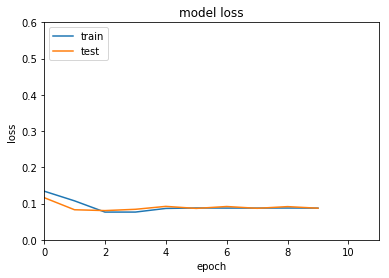

70
Train on 2850542 samples, validate on 1221661 samples
Epoch 1/10
2850542/2850542 [==============================] - 10s 3us/step - loss: 0.4730 - mean_absolute_error: 0.4730 - val_loss: 0.1691 - val_mean_absolute_error: 0.1691
Epoch 2/10
2850542/2850542 [==============================] - 9s 3us/step - loss: 0.1440 - mean_absolute_error: 0.1440 - val_loss: 0.0972 - val_mean_absolute_error: 0.0972
Epoch 3/10
2850542/2850542 [==============================] - 8s 3us/step - loss: 0.0987 - mean_absolute_error: 0.0987 - val_loss: 0.1081 - val_mean_absolute_error: 0.1081
Epoch 4/10
2850542/2850542 [==============================] - 9s 3us/step - loss: 0.0989 - mean_absolute_error: 0.0989 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923
Epoch 5/10
2850542/2850542 [==============================] - 10s 4us/step - loss: 0.1073 - mean_absolute_error: 0.1073 - val_loss: 0.1313 - val_mean_absolute_error: 0.1313
Epoch 6/10
2850542/2850542 [==============================] - 10s 4us/step - loss

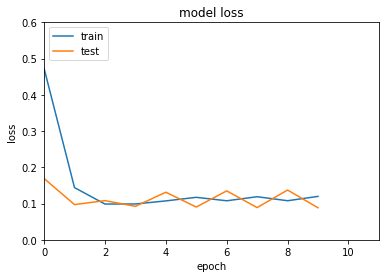

140
Train on 2850542 samples, validate on 1221661 samples
Epoch 1/10
2850542/2850542 [==============================] - 25s 9us/step - loss: 0.4021 - mean_absolute_error: 0.4021 - val_loss: 0.1951 - val_mean_absolute_error: 0.1951
Epoch 2/10
2850542/2850542 [==============================] - 23s 8us/step - loss: 0.2263 - mean_absolute_error: 0.2263 - val_loss: 0.1335 - val_mean_absolute_error: 0.1335
Epoch 3/10
2850542/2850542 [==============================] - 24s 8us/step - loss: 0.1478 - mean_absolute_error: 0.1478 - val_loss: 0.1758 - val_mean_absolute_error: 0.1758
Epoch 4/10
2850542/2850542 [==============================] - 24s 8us/step - loss: 0.1505 - mean_absolute_error: 0.1505 - val_loss: 0.1030 - val_mean_absolute_error: 0.1030
Epoch 5/10
2850542/2850542 [==============================] - 25s 9us/step - loss: 0.1395 - mean_absolute_error: 0.1395 - val_loss: 0.2106 - val_mean_absolute_error: 0.2106
Epoch 6/10
2850542/2850542 [==============================] - 24s 8us/step - 

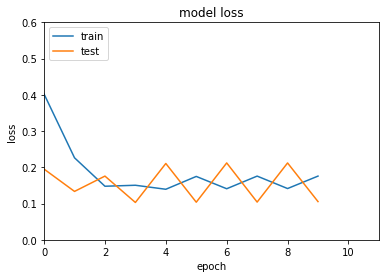

In [14]:
#run linear regression model over three degrees and plot train vs test loss per epoch
for degree in range(1,4):
    X_new = modify_dataset(X, degree)
    lrmodel = getLinearRegressionModel(len(X_new.columns.values))
    history = lrmodel.fit(X_new,y, batch_size=1000000, epochs=10, validation_split=.3)
    axes = plt.gca()
    axes.set_xlim([0, 11])
    axes.set_ylim([0, 0.6])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss for')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.grid()
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()